# Analisis de Datos del Grupo D
### **Universidad Tecnologica Nacional y Universidad Nacional Tres De Febrero**

En esta notebook se abordara el análisis de los datos extraídos durante el proceso de ETL, con el objetivo de proporcionar un marco para que el **Consejo Nacional de Calidad de la Educación** pueda crear una estrategía de estimulación de carreras, utilizando como base análisis de las diferentes poblaciones de estudiantes.

**Los objetivos de este análisis son:**
  - Realizar un análisis exploratorio de las universidades de este grupo
  - Realizar una análisis descriptivo
  - Obtener datos relevantes, comunmente conocidos como insights
  - Concluir los aspectos más importates del dataset



## Configuraciones

En esta sección configuramos todo lo necesario para el análisis, desde las librerías utilizadas hasta los colores elegidos para realizar los gráficos y las propiedades escenciales de cada uno.

In [56]:
#Realizamos los imports necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors


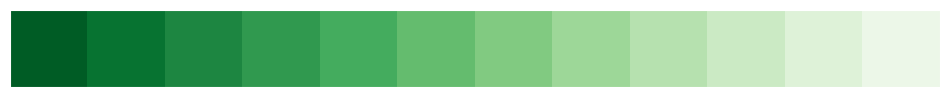

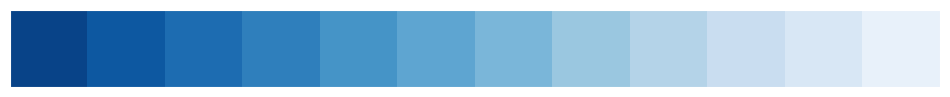

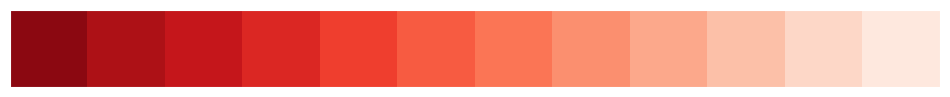

In [57]:
plt.rcParams['figure.dpi'] = 100
#plt.rcParams['figure.figsize'] = (8,12)
sns.set_style('dark')
colors_green = sns.color_palette("Greens",12)[::-1]
colors_blue = sns.color_palette("Blues",12)[::-1]
colors_red = sns.color_palette("Reds",12)[::-1]
sns.palplot(colors_green)
sns.palplot(colors_blue)
sns.palplot(colors_red)


In [58]:
#Colocamos el nombre de las universidades en dos variables
#Para una futura reutilización del codigo

university1 = 'GrupoD_tecnologica_universidad'
university1_name = 'universidad Tecnologica Nacional'

university2 = 'GrupoD_tres_de_febrero_universidad'
university2_name = 'universidad Nacional Tres de febrero'

df_1 = pd.read_csv(f'../../datasets/{university1}_process.txt', sep='\t')
df_2 = pd.read_csv(f'../../datasets/{university2}_process.txt', sep='\t')



In [59]:
#imprimimos las columnas de ambas tablas

df_1.columns #Universidad_tecnologica_universidad


Index(['university', 'career', 'inscription_date', 'first_name', 'last_name',
       'gender', 'age', 'postal_code', 'location', 'email'],
      dtype='object')

In [60]:
df_2.columns #Universidad Tres de Febrero


Index(['university', 'career', 'inscription_date', 'first_name', 'last_name',
       'gender', 'age', 'postal_code', 'location', 'email'],
      dtype='object')

In [61]:
# para hacer un estudio sobre las carreras de ambas universidades imprimo la cantidad de carreras que contiene cada una

print(f'La cantida de carreras en la {university1_name}es de:',len(df_1.career.unique()))
print(f'La cantida de carreras en la {university2_name} es de:',len(df_1.career.unique()))


La cantida de carreras en la universidad Tecnologica Nacionales de: 33
La cantida de carreras en la universidad Nacional Tres de febrero es de: 33


In [62]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852 entries, 0 to 1851
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   university        1852 non-null   object
 1   career            1852 non-null   object
 2   inscription_date  1852 non-null   object
 3   first_name        1852 non-null   object
 4   last_name         1852 non-null   object
 5   gender            1852 non-null   object
 6   age               1852 non-null   int64 
 7   postal_code       1852 non-null   int64 
 8   location          1852 non-null   object
 9   email             1852 non-null   object
dtypes: int64(2), object(8)
memory usage: 144.8+ KB


In [63]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4125 entries, 0 to 4124
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   university        4125 non-null   object
 1   career            4125 non-null   object
 2   inscription_date  4125 non-null   object
 3   first_name        4089 non-null   object
 4   last_name         4125 non-null   object
 5   gender            4125 non-null   object
 6   age               4125 non-null   int64 
 7   postal_code       4125 non-null   int64 
 8   location          4125 non-null   object
 9   email             4125 non-null   object
dtypes: int64(2), object(8)
memory usage: 322.4+ KB


Las únicas variables númericas dentro del dataset es la edad y el código postal, aunque este último más bien debería considerarse como categórica.

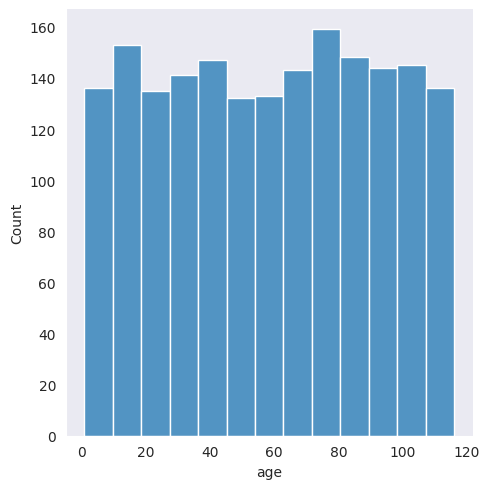

In [64]:
sns.displot(df_1.age)



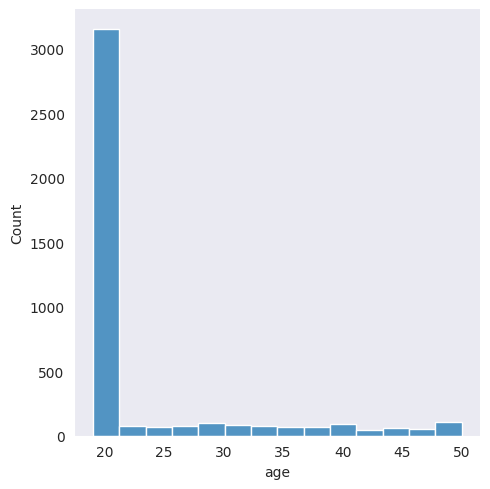

In [65]:
sns.displot(df_2.age)

In [66]:
df_1 = df_1[df_1.age.between(15,85)] #aplicamos una reduccion del maximo y minimo de edad que puede tener un alumno


Las variables de este dataset extraido corresponde a las siguientes columnas:

- **'university'**: esta variable menciona la universidad en la que asiste el alumno
- **'career'**: carrera de la que es alumno
- **'inscription_date'**: fecha en la que se inscribio, 
- **'first_name'**: nombres
- **'last_name'**: apellido/s
- **'gender'**: género declarado
- **'age'**: edad en años
- **'postal_code'**: código postal
- **'location'**: localidad
- **'email'**: mail de contacto

In [67]:
df_geonames = pd.read_csv('../AR_geonames.txt', sep='\t', header=None,on_bad_lines='skip')


Este dataset externo trae datos para enriquecer el dataset original y aporta variables imporantes como la **region**, que en este caso hace referencia a la provincia.

In [68]:
df_geonames.dropna(axis=1, inplace=True)



In [69]:
df_geonames.columns = ['country','postal_code', 'location', 'region', 'type', 'lat', 'lon', 'type_2']

In [70]:
df_1geonames_merge = df_geonames.merge(df_1, on='postal_code', how='right')

In [71]:
df_2geonames_merge = df_geonames.merge(df_2, on='postal_code', how='right')

In [72]:
df_2geonames_merge = df_geonames.merge(df_2, on='postal_code', how='right')
df_1geonames_merge.head(2)


,country,postal_code,location_x,region,type,lat,lon,type_2,university,career,inscription_date,first_name,last_name,gender,age,location_y,email
0,AR,1748,EL GRANADERO,Buenos Aires,B,-34.6181,-58.9564,3.0,universidad tecnológica nacional,licenciatura en ciencias geológicas,2020-09-28,jeffrey,nash,male,84,general rodriguez,bmorgan@hotmail.com
1,AR,1748,LA FRATERNIDAD,Buenos Aires,B,-34.6181,-58.9564,3.0,universidad tecnológica nacional,licenciatura en ciencias geológicas,2020-09-28,jeffrey,nash,male,84,general rodriguez,bmorgan@hotmail.com


Podemos observar nuestro dataset expandido con los nuevos datos geográficos.

## Análisis exploratorío

Un primer paso para describir nuestro dataset es ver las carreras cursadas dentro de las universidades estudiadas

Text(0, 0.5, 'Carrera')

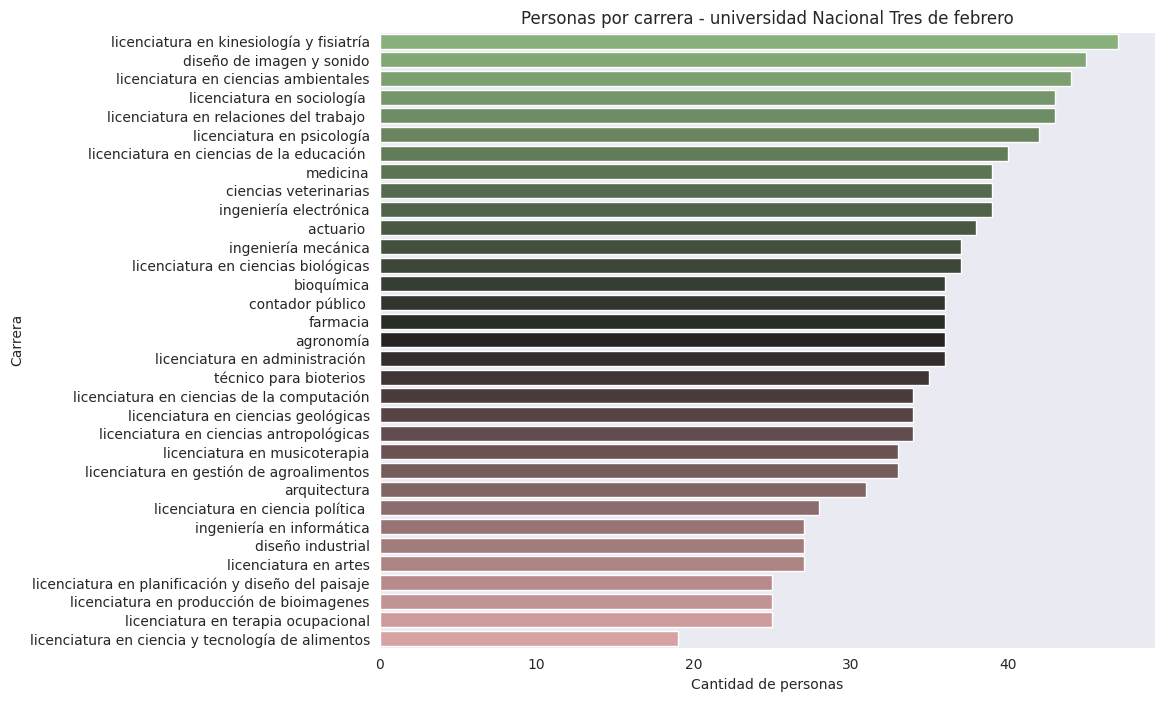

In [73]:
df_aux = df_1.groupby('career').count().reset_index().sort_values('university', ascending=False)
palette = sns.diverging_palette(120,12,s=55,l=70,n=33,center='dark')
plt.figure(figsize=(10, 8))
sns.barplot(data=df_aux, x='university', y='career', palette=palette)

plt.title(f'Personas por carrera - {university2_name}')
plt.xlabel('Cantidad de personas')
plt.ylabel('Carrera')


Text(0, 0.5, 'Carrera')

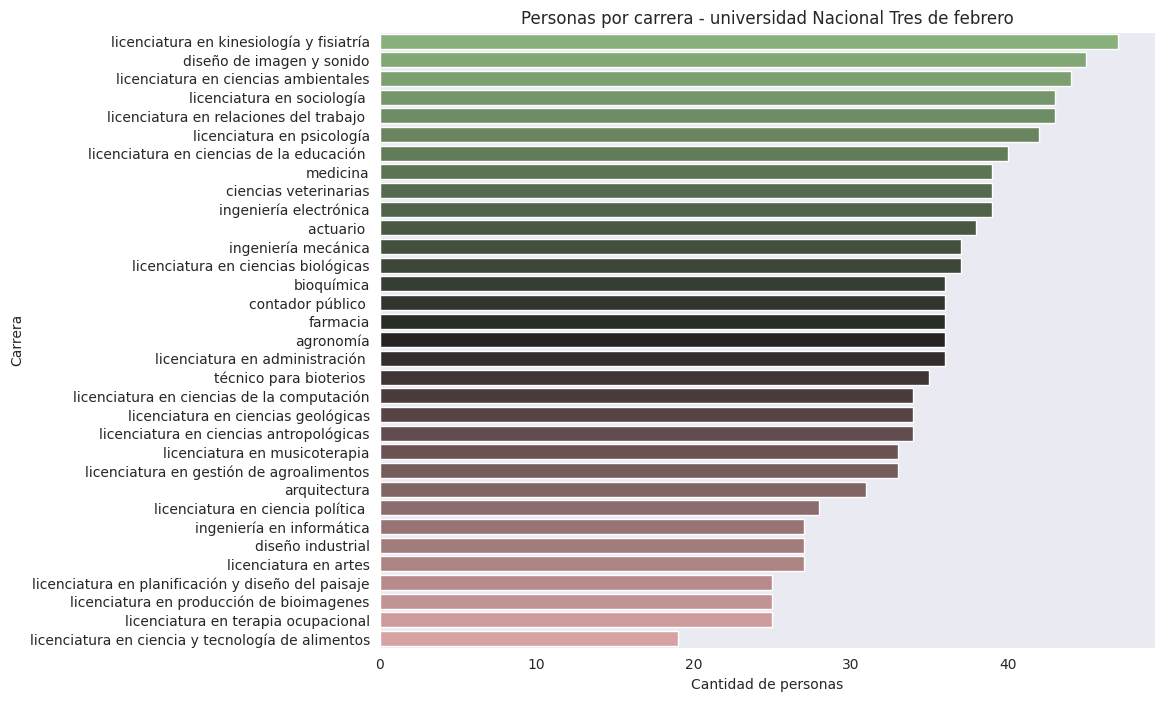

In [74]:
df_aux = df_1.groupby('career').count().reset_index().sort_values('university', ascending=False)
palette = sns.diverging_palette(120,12,s=55,l=70,n=33,center='dark')
plt.figure(figsize=(10, 8))
sns.barplot(data=df_aux, x='university', y='career', palette=palette)

plt.title(f'Personas por carrera - {university2_name}')
plt.xlabel('Cantidad de personas')
plt.ylabel('Carrera')


## Top 10 de carreras con más  y menos alumnos  de ambas universidades comparandola con la media de personas para cada universidad

Text(0, 0.5, 'Carrera')

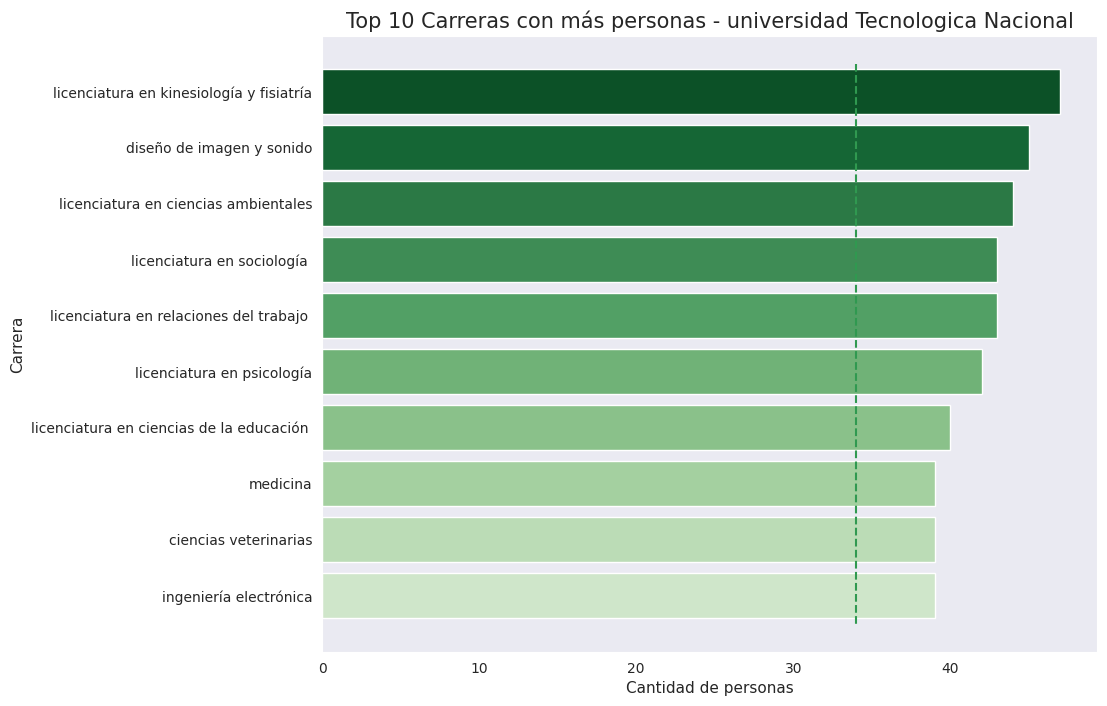

<Figure size 1000x800 with 0 Axes>

In [75]:


df_aux = df_1.groupby('career').count().reset_index().sort_values('university', ascending=False)
media_alumns_carrera = int(df_1.groupby('career').size().mean())

fig, ax = plt.subplots(figsize=(10, 8))


plt.figure(figsize=(10, 8))


sns.barplot(data=df_aux.head(10), x='university', y='career', palette=colors_green, ax=ax)
ax.plot((media_alumns_carrera,media_alumns_carrera), (-0.5,9.5), color=colors_green[3],linestyle='dashed')
ax.set_title(f'Top 10 Carreras con más personas - {university1_name}',{'fontsize':15})
ax.set_xlabel('Cantidad de personas', {'fontsize':11})
ax.set_ylabel('Carrera', {'fontsize':11})

/tmp/ipykernel_442597/497808238.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


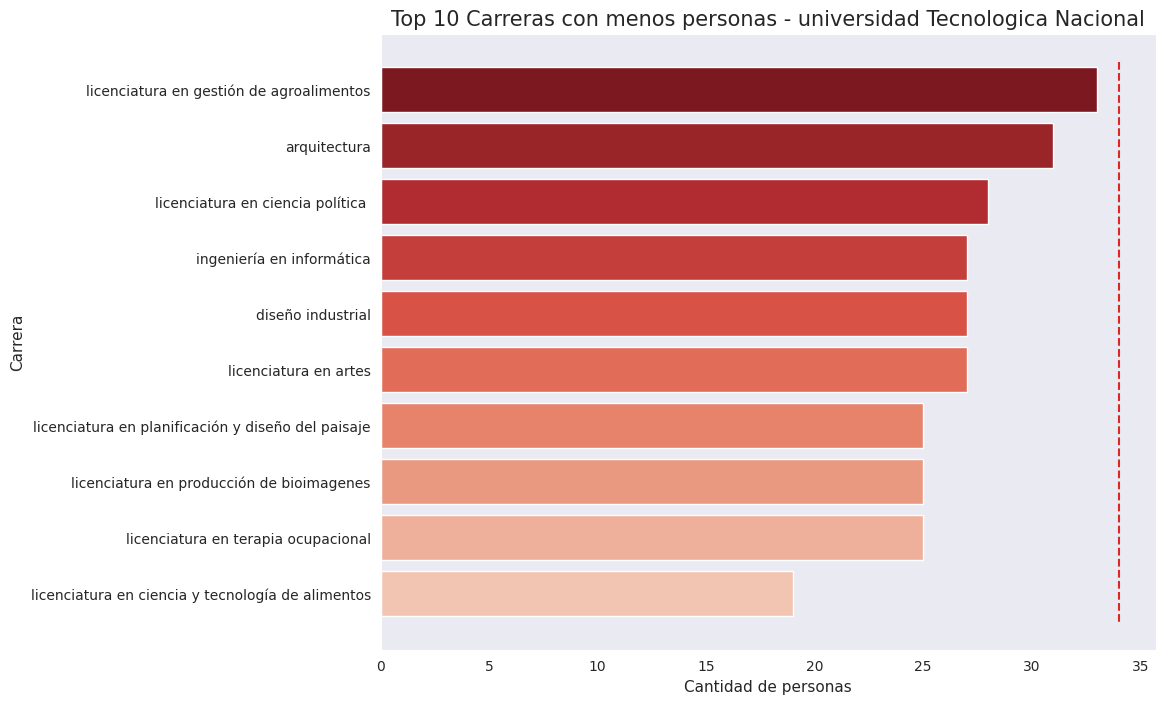

In [76]:
df_aux = df_1.groupby('career').count().reset_index().sort_values('university', ascending=False)
media_alumns_carrera = int(df_1.groupby('career').size().mean())

fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(data=df_aux.tail(10), x='university', y='career', palette=colors_red, ax=ax)
ax.plot((media_alumns_carrera,media_alumns_carrera), (-0.5,9.5), color=colors_red[3],linestyle='dashed')
ax.set_title(f'Top 10 Carreras con menos personas - {university1_name}',{'fontsize':15})
ax.set_xlabel('Cantidad de personas', {'fontsize':11})
ax.set_ylabel('Carrera', {'fontsize':11})

fig.show()

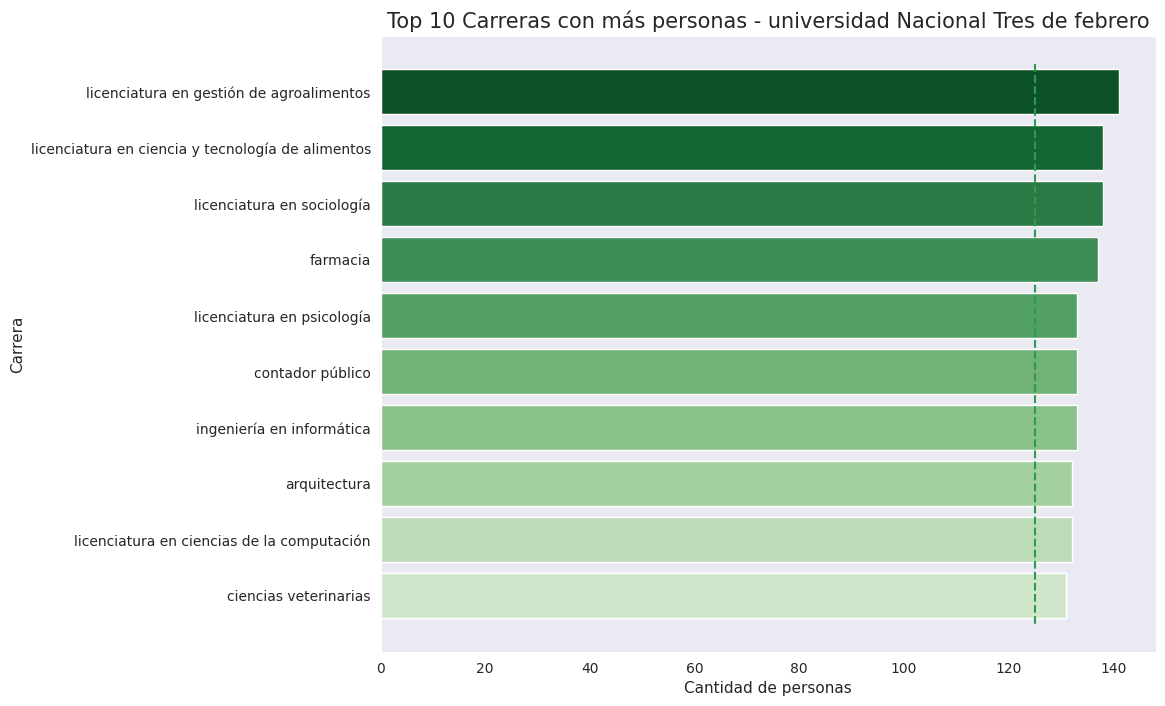

<Figure size 1000x800 with 0 Axes>

In [77]:

df_aux = df_2.groupby('career').count().reset_index().sort_values('university', ascending=False)
media_alumns_carrera = int(df_2.groupby('career').size().mean())

fig, ax = plt.subplots(figsize=(10, 8))


plt.figure(figsize=(10, 8))


sns.barplot(data=df_aux.head(10), x='university', y='career', palette=colors_green, ax=ax)
ax.plot((media_alumns_carrera,media_alumns_carrera), (-0.5,9.5), color=colors_green[3],linestyle='dashed')
ax.set_title(f'Top 10 Carreras con más personas - {university2_name}',{'fontsize':15})
ax.set_xlabel('Cantidad de personas', {'fontsize':11})
ax.set_ylabel('Carrera', {'fontsize':11})
plt.show()

/tmp/ipykernel_442597/250912100.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


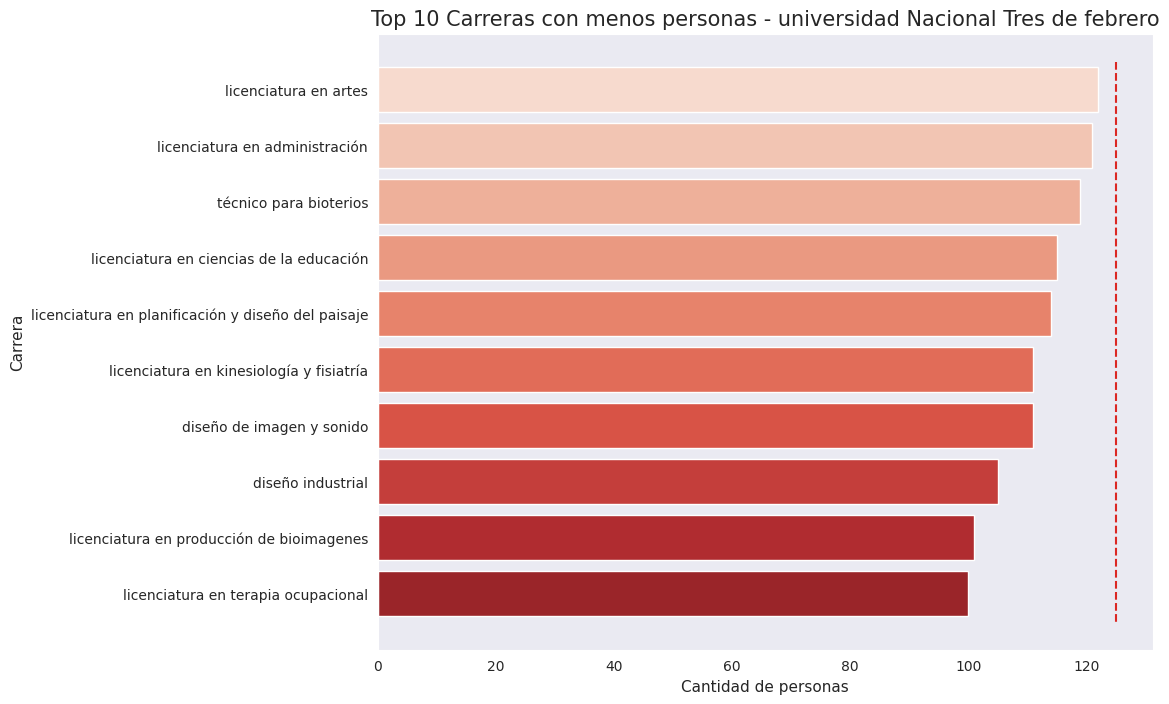

In [78]:
df_aux = df_2.groupby('career').count().reset_index().sort_values('university', ascending=False)
media_alumns_carrera = int(df_2.groupby('career').size().mean())

fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(data=df_aux.tail(10), x='university', y='career', palette=colors_red[10::-1], ax=ax)
ax.plot((media_alumns_carrera,media_alumns_carrera), (-0.5,9.5), color=colors_red[3],linestyle='dashed')
ax.set_title(f'Top 10 Carreras con menos personas - {university2_name}',{'fontsize':15})
ax.set_xlabel('Cantidad de personas', {'fontsize':11})
ax.set_ylabel('Carrera', {'fontsize':11})

fig.show()

Con estos podemos ver en donde enfocar el programa de becas para cada universidad, impulsando en las carreras que menos personas tienen.

<AxesSubplot: xlabel='gender', ylabel='age'>

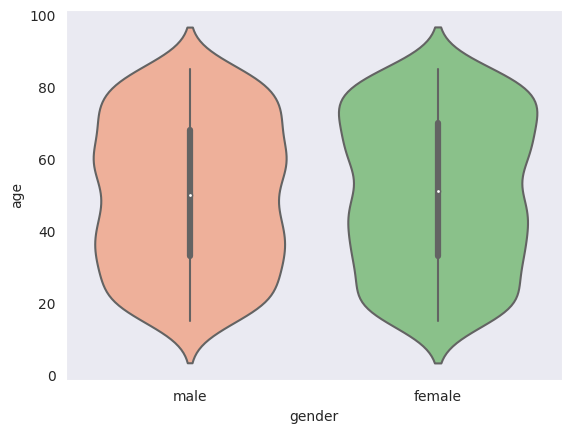

In [79]:
#Tambien otro analisis que nos puede ayudar es ver la distribucion por edad tanto entre hombres y mujeres de cada universidad
sns.violinplot(data=df_1,y='age', x='gender', palette=[colors_red[8], colors_green[6]])

<AxesSubplot: xlabel='gender', ylabel='age'>

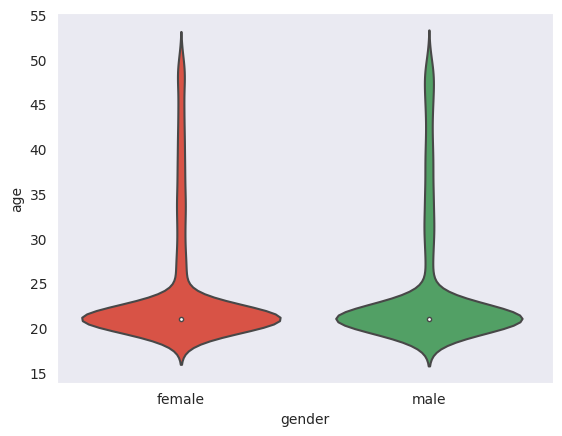

In [80]:
sns.violinplot(data=df_2,y='age', x='gender', palette=[colors_red[4], colors_green[4]])

*como se logra ver La UTN contiene mas disperscion de personas en una edad mayor mientras que la de 3 de febrero son mas jovenes los Alumnos*

### top 10 localidades por alumnos


In [83]:
df_1.location.value_counts().head(10)

bella vista             5
abra                    5
algarrobo               5
estacion saguier        5
la punta                4
colonia bella italia    4
agua blanca             4
25 de mayo              4
jose leon suarez        4
alto del saladillo      4
Name: location, dtype: int64

In [84]:
df_2.location.value_counts().head(10)

LA TRANCA             10
ISLA GRAN MALVINA      9
ALTO DE LAS PLUMAS     9
ARBOL VERDE            8
ALTAMIRA               8
CAÑADA LA NEGRA        8
ARROYO CLARO           8
BARTOLOME MITRE        8
ALISOS  DE ABAJO       8
BARRIO GARIN NORTE     8
Name: location, dtype: int64

**Distribucion de alumnos por edad y género**

<AxesSubplot: xlabel='age', ylabel='Density'>

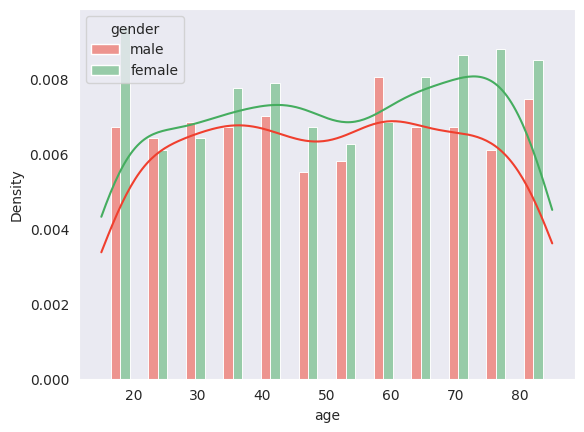

In [85]:
sns.histplot(data=df_1,x='age', hue='gender', kde=True,fill=True,multiple='dodge', shrink=.5,stat='density', palette=[colors_red[4], colors_green[4]])


<AxesSubplot: xlabel='age', ylabel='Density'>

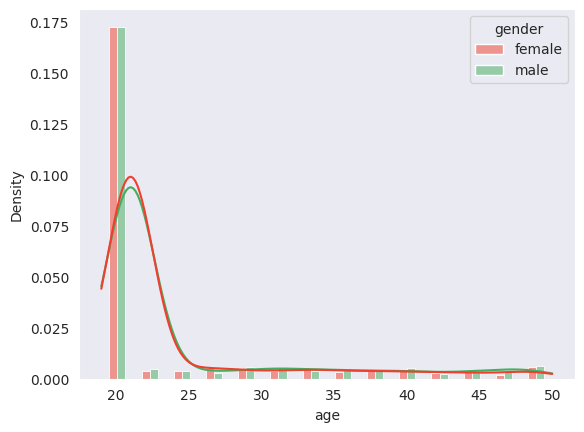

In [86]:
sns.histplot(data=df_2,x='age', hue='gender', kde=True,fill=True,multiple='dodge', shrink=.5,stat='density', palette=[colors_red[4], colors_green[4]])


In [87]:
df_1.inscription_date = pd.to_datetime(df_1.inscription_date)
df_2.inscription_date = pd.to_datetime(df_2.inscription_date)



Segregación por tipo de carrera


In [88]:
def clasificador(x):
    
    clasificador ={
    'exactas_nat':['agronomía','licenciatura en ciencias biológicas','licenciatura en ciencias ambientales','licenciatura en ciencias biológicas', 'licenciatura en ciencias geológicas', 
    'técnico para bioterios', 'ingeniería electrónica', 'ingeniería en informática','ingeniería mecánica','licenciatura en ciencias de la computación'],
    'ciencias_salud':['ciencias veterinarias','farmacia','licenciatura en kinesiología y fisiatría','licenciatura en producción de bioimagenes','medicina','licenciatura en gestión de agroalimentos', 'licenciatura en ciencia y tecnología de alimentos','bioquímica'],
    'diseño_art':['diseño industrial', 'diseño de imagen y sonido', 'licenciatura en artes', 'licenciatura en musicoterapia', ],
    'empresarial':['actuario', 'contador público','licenciatura en administración'],
    'sociales':['licenciatura en ciencias antropológicas','licenciatura en ciencias de la educación','licenciatura en psicología', 'licenciatura en relaciones del trabajo','licenciatura en sociología','licenciatura en terapia ocupacional']
}
    if x in clasificador['exactas_nat']:
        return "Exactas y Naturales"
    elif x in clasificador['diseño_art']:
        return "Artes y Diseño"
    elif x in clasificador['empresarial']:
        return "Ciencias Empresariales"
    elif x in clasificador['ciencias_salud']:
        return "Salud"
    else:
        return "Sociales"
df_1['tipo_career'] = df_1.career.apply(clasificador)
df_2['tipo_career'] = df_2.career.apply(clasificador)

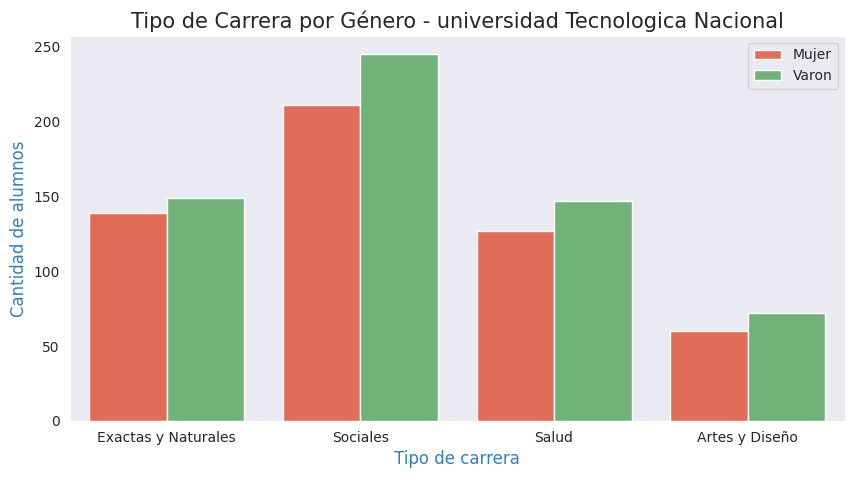

In [89]:
fig,ax = plt.subplots(figsize=(10,5))
g = sns.countplot(data=df_1,
                    x='tipo_career',
                    hue='gender',
                    palette=[colors_red[5],
                    colors_green[5]],
                    ax=ax)

g.set_title(f'Tipo de Carrera por Género - {university1_name}',{'fontsize':15})
g.set_ylabel('Cantidad de alumnos',{'fontsize':12,'color':colors_blue[3]})
g.set_xlabel('Tipo de carrera',{'fontsize':12,'color':colors_blue[3]})
g.set_xticklabels(labels=g.get_xticklabels())
ax.legend(labels=['Mujer','Varon'])


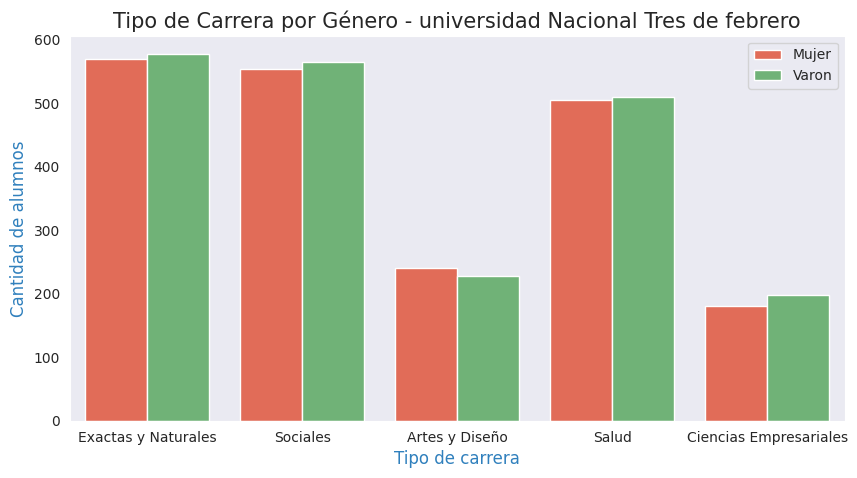

In [90]:
fig,ax = plt.subplots(figsize=(10,5))
g = sns.countplot(data=df_2,
                    x='tipo_career',
                    hue='gender',
                    palette=[colors_red[5],
                    colors_green[5]],
                    ax=ax)

g.set_title(f'Tipo de Carrera por Género - {university2_name}',{'fontsize':15})
g.set_ylabel('Cantidad de alumnos',{'fontsize':12,'color':colors_blue[3]})
g.set_xlabel('Tipo de carrera',{'fontsize':12,'color':colors_blue[3]})
g.set_xticklabels(labels=g.get_xticklabels())
ax.legend(labels=['Mujer','Varon'])

*Esta grafica nos ayuda a ver la cantidad de alumno por el tipo de carrera y la proporcion con respecto a las demas* 

/tmp/ipykernel_442597/2202455473.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


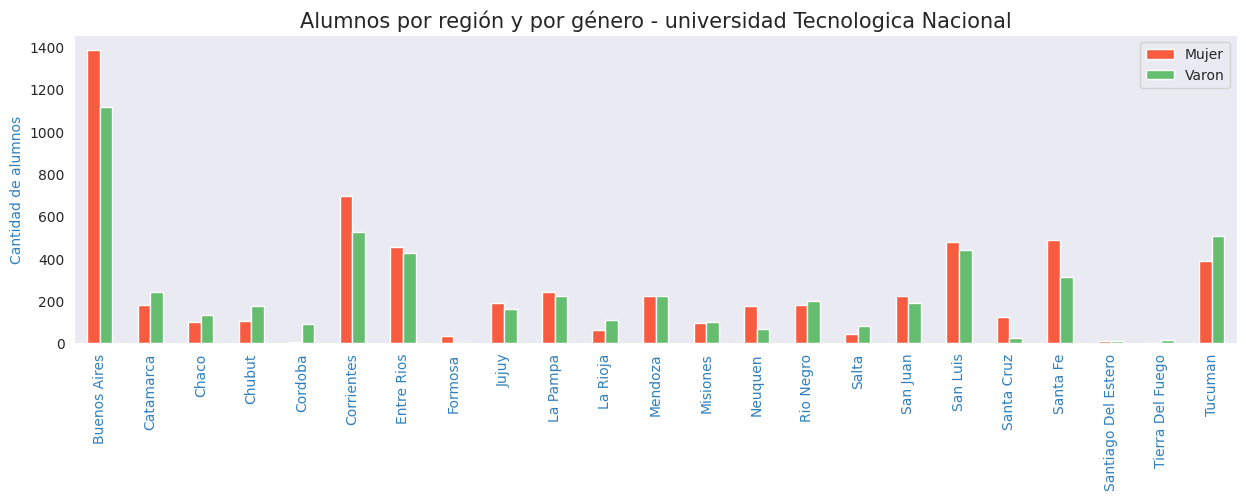

In [91]:
fig,ax=plt.subplots(figsize=(15,4))
df_aux = df_1geonames_merge.pivot_table(
    index=['region'],
    columns='gender',
    values=['first_name'],
    aggfunc={'region':'count'}
)
df_aux.plot(kind='bar',color=(colors_red[5],colors_green[5]),ax=ax)
ax.set_title(f'Alumnos por región y por género - {university1_name}',{'fontsize':15})
ax.set_ylabel('Cantidad de alumnos',{'color':colors_blue[3]})
ax.tick_params(axis='x', colors=colors_blue[3])
ax.set_xlabel('')
ax.legend(labels=['Mujer','Varon'])
fig.show()


/tmp/ipykernel_442597/3203588924.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


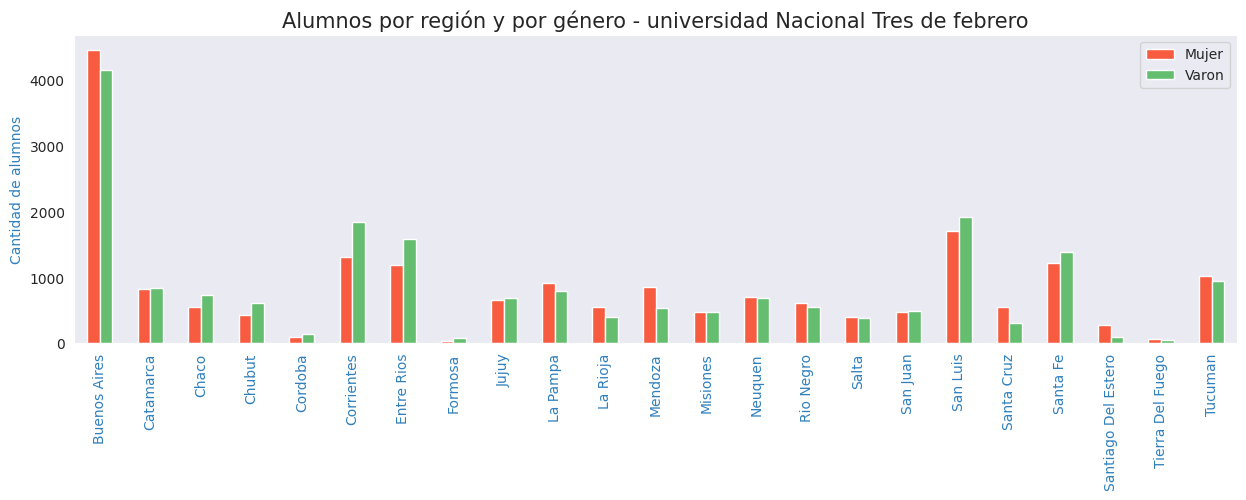

In [94]:
fig,ax=plt.subplots(figsize=(15,4))
df_aux = df_2geonames_merge.pivot_table(
    index=['region'],
    columns='gender',
    values=['first_name'],
    aggfunc={'region':'count'}
)
df_aux.plot(kind='bar',color=(colors_red[5],colors_green[5]),ax=ax)
ax.set_title(f'Alumnos por región y por género - {university2_name}',{'fontsize':15})
ax.set_ylabel('Cantidad de alumnos',{'color':colors_blue[3]})
ax.tick_params(axis='x', colors=colors_blue[3])
ax.set_xlabel('')
ax.legend(labels=['Mujer','Varon'])
fig.show()

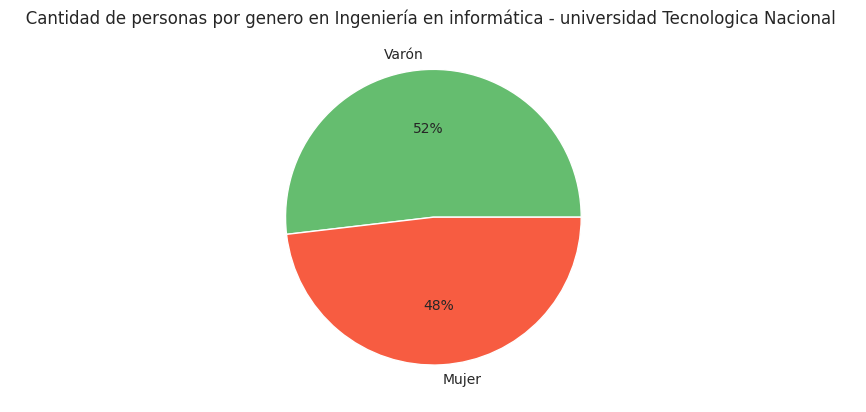

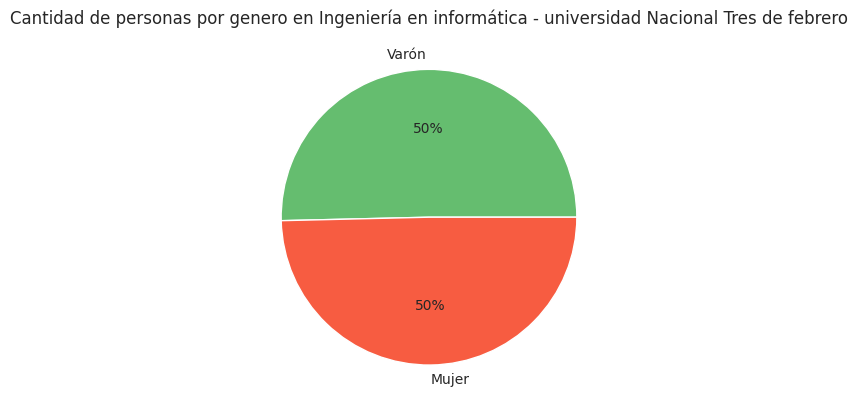

In [95]:
career = 'ingeniería en informática'

df_aux = df_1.query(f'career == "{career}"').gender.value_counts()

colors = sns.color_palette('pastel')
labels = ['Varón', 'Mujer']
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'   Cantidad de personas por genero en {career.capitalize()} - {university1_name}    ')
plt.show()

df_aux = df_2.query(f'career == "{career}"').gender.value_counts()
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'Cantidad de personas por genero en {career.capitalize()} - {university2_name}')
plt.show()

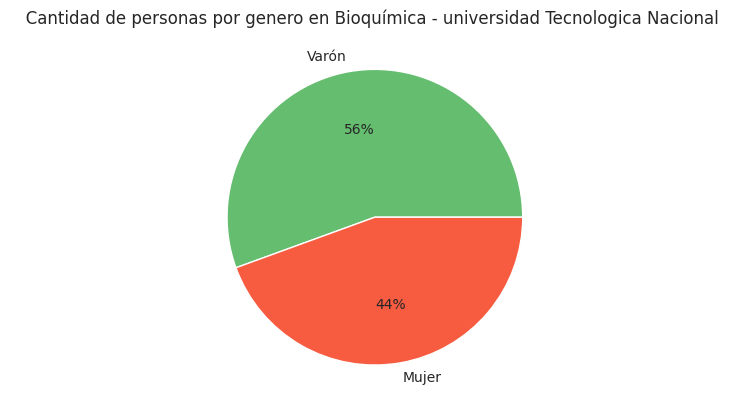

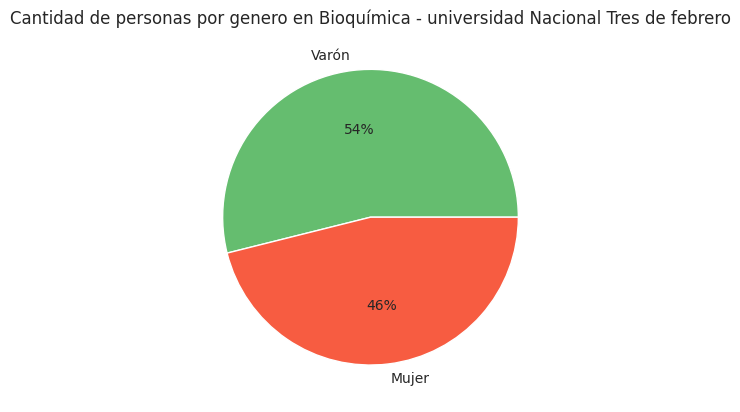

In [96]:
career = 'bioquímica'

df_aux = df_1.query(f'career == "{career}"').gender.value_counts()

colors = sns.color_palette('pastel')
labels = ['Varón', 'Mujer']
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'   Cantidad de personas por genero en {career.capitalize()} - {university1_name}    ')
plt.show()

df_aux = df_2.query(f'career == "{career}"').gender.value_counts()
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'Cantidad de personas por genero en {career.capitalize()} - {university2_name}')
plt.show()


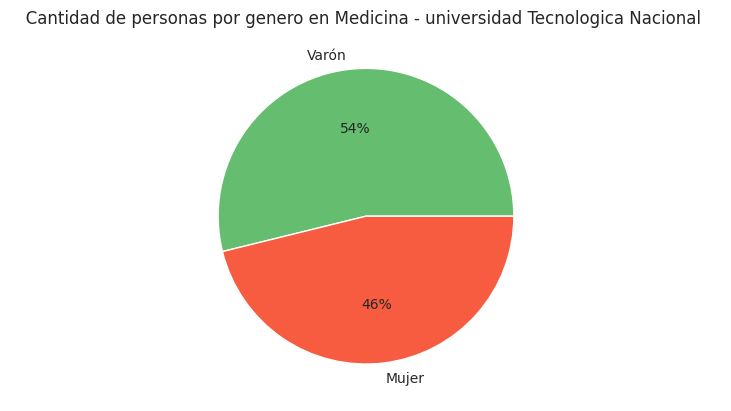

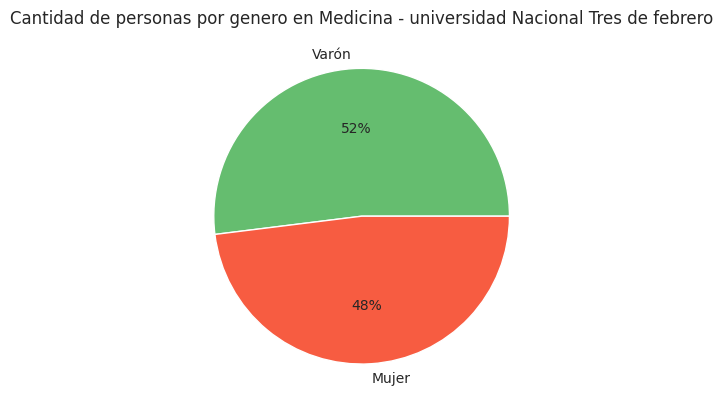

In [97]:
career = 'medicina'

df_aux = df_1.query(f'career == "{career}"').gender.value_counts()

colors = sns.color_palette('pastel')
labels = ['Varón', 'Mujer']
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'   Cantidad de personas por genero en {career.capitalize()} - {university1_name}    ')
plt.show()

df_aux = df_2.query(f'career == "{career}"').gender.value_counts()
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'Cantidad de personas por genero en {career.capitalize()} - {university2_name}')
plt.show()